<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final project - Data Visualization
</div>

## **Thông tin nhóm**

#### Thành viên 1:
##### * **Họ và tên:** Võ Duy Anh
##### * **MSSV:** 21127221

#### Thành viên 2:
##### * **Họ và tên:** Nguyễn Mậu Gia Bảo
##### * **MSSV:** 21127583

#### Thành viên 3:
##### * **Họ và tên:** Vũ Minh Phát
##### * **MSSV:** 21127739

### **Thư viện hỗ trợ**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### **1. Giới thiệu về bộ dữ liệu**

### **2. Khám phá dữ liệu**

#### Đọc dữ liệu từ file

In [2]:
data = pd.read_csv("hotel_bookings.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


#### 📌 Dữ liệu có bao nhiêu hàng và bao nhiêu cột?

In [3]:
row,col = data.shape
print(f'Dữ liệu có {row} hàng và {col} cột')

Dữ liệu có 119390 hàng và 32 cột


#### 📌 Ý nghĩa của mỗi hàng là gì?

Biểu diễn một đơn đặt phòng khách sạn cụ thể

####  📌 Dữ liệu có các dòng bị lặp không?

In [4]:
detectDupSeries = data.duplicated(keep='first')
num_duplicated_rows = detectDupSeries.sum()

if num_duplicated_rows == 0:
    print("Dữ liệu không có dòng bị trùng lặp!")
else:
    print(f"Dữ liệu có {num_duplicated_rows} dòng bị trùng lặp.")

Dữ liệu có 31994 dòng bị trùng lặp.


In [5]:
duplicate_ratio = num_duplicated_rows / len(data)
print(f"Tỷ lệ trùng lặp của dữ liệu là: {duplicate_ratio:.2%}")

Tỷ lệ trùng lặp của dữ liệu là: 26.80%


Nhìn chung, với tỉ lệ trùng lặp hơn 26% có thể thấy bộ dữ liệu đang có tỉ lệ trùng lặp khá lớn

Loại bỏ các dòng trùng lặp

In [6]:
data = data.drop_duplicates()

#### 📌 Ý nghĩa của mỗi cột là gì?

<table style="width: 100%; border-collapse: collapse;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">STT</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Cột</th>
      <th style="background-color: #04B1CC; color: white; font-size :15px; font-weight: bold; text-align: left; padding: 8px;">Ý nghĩa</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-size: 14px; text-align: left;">1</td>
      <td style="font-size: 14px; text-align: left;">hotel</td>
      <td style="font-size: 14px; text-align: left;">Tên khách sạn</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">2</td>
      <td style="font-size: 14px; text-align: left;">is_canceled</td>
      <td style="font-size: 14px; text-align: left;">Cờ lệnh liệu đặt phòng đã bị hủy hay không (0 nếu không hủy, 1 nếu đã hủy).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">3</td>
      <td style="font-size: 14px; text-align: left;">lead_time</td>
      <td style="font-size: 14px; text-align: left;">Số ngày giữa ngày đặt phòng và ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">4</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_year</td>
      <td style="font-size: 14px; text-align: left;"> Năm của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">5</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_month</td>
      <td style="font-size: 14px; text-align: left;">Tháng của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">6</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_week_number</td>
      <td style="font-size: 14px; text-align: left;">Tuần trong năm của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">7</td>
      <td style="font-size: 14px; text-align: left;">arrival_date_day_of_month</td>
      <td style="font-size: 14px; text-align: left;">Ngày trong tháng của ngày đến.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">8</td>
      <td style="font-size: 14px; text-align: left;">stays_in_weekend_nights</td>
      <td style="font-size: 14px; text-align: left;">Số đêm lưu trú vào cuối tuần.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">9</td>
      <td style="font-size: 14px; text-align: left;">stays_in_week_nights</td>
      <td style="font-size: 14px; text-align: left;">Số đêm lưu trú vào các ngày trong tuần.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">10</td>
      <td style="font-size: 14px; text-align: left;">adults</td>
      <td style="font-size: 14px; text-align: left;">Số người lớn.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">11</td>
      <td style="font-size: 14px; text-align: left;">children</td>
      <td style="font-size: 14px; text-align: left;">Số trẻ em.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">12</td>
      <td style="font-size: 14px; text-align: left;">babies</td>
      <td style="font-size: 14px; text-align: left;">Số em bé.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">13</td>
      <td style="font-size: 14px; text-align: left;">meal</td>
      <td style="font-size: 14px; text-align: left;">Loại bữa ăn.</td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">14</td>
      <td style="font-size: 14px; text-align: left;">country</td>
      <td style="font-size: 14px; text-align: left;">Quốc gia của khách hàng.</td>
    </tr>
     <tr>
      <td style="font-size: 14px; text-align: left;">15</td>
      <td style="font-size: 14px; text-align: left;">market_segment</td>
      <td style="font-size: 14px; text-align: left;">Phân đoạn thị trường.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">16</td>
      <td style="font-size: 14px; text-align: left;">distribution_channel</td>
      <td style="font-size: 14px; text-align: left;">Kênh phân phối.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">17</td>
      <td style="font-size: 14px; text-align: left;">is_repeated_guest</td>
      <td style="font-size: 14px; text-align: left;">Cờ lệnh thể hiện liệu khách hàng đã từng lưu trú trước đó hay không.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">18</td>
      <td style="font-size: 14px; text-align: left;">previous_cancellations</td>
      <td style="font-size: 14px; text-align: left;">Số lần hủy đặt phòng trước đó.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">19</td>
      <td style="font-size: 14px; text-align: left;">previous_bookings_not_canceled</td>
      <td style="font-size: 14px; text-align: left;">Số lần đặt phòng trước đó nhưng không bị hủy.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">20</td>
      <td style="font-size: 14px; text-align: left;">reserved_room_type</td>
      <td style="font-size: 14px; text-align: left;">Loại phòng đã đặt.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">21</td>
      <td style="font-size: 14px; text-align: left;">assigned_room_type</td>
      <td style="font-size: 14px; text-align: left;">Loại phòng được gán cho đơn đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">22</td>
      <td style="font-size: 14px; text-align: left;">booking_changes</td>
      <td style="font-size: 14px; text-align: left;">Số lần thay đổi đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">23</td>
      <td style="font-size: 14px; text-align: left;">deposit_type</td>
      <td style="font-size: 14px; text-align: left;">Loại tiền đặt cọc.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">24</td>
      <td style="font-size: 14px; text-align: left;">agent</td>
      <td style="font-size: 14px; text-align: left;">ID của đại lý đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">25</td>
      <td style="font-size: 14px; text-align: left;">company</td>
      <td style="font-size: 14px; text-align: left;">ID của công ty đặt phòng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">26</td>
      <td style="font-size: 14px; text-align: left;">days_in_waiting_list</td>
      <td style="font-size: 14px; text-align: left;">Số ngày trong danh sách chờ.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">27</td>
      <td style="font-size: 14px; text-align: left;">customer_type</td>
      <td style="font-size: 14px; text-align: left;">Loại khách hàng.</td>
    </tr>
      <tr>
      <td style="font-size: 14px; text-align: left;">28</td>
      <td style="font-size: 14px; text-align: left;">adr</td>
      <td style="font-size: 14px; text-align: left;">Giá trung bình hàng đêm (Average Daily Rate).</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">29</td>
      <td style="font-size: 14px; text-align: left;">required_car_parking_spaces</td>
      <td style="font-size: 14px; text-align: left;">Số lượng chỗ đậu xe yêu cầu.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">30</td>
      <td style="font-size: 14px; text-align: left;">total_of_special_requests</td>
      <td style="font-size: 14px; text-align: left;">Tổng số yêu cầu đặc biệt.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">31</td>
      <td style="font-size: 14px; text-align: left;">reservation_status</td>
      <td style="font-size: 14px; text-align: left;">Trạng thái đặt phòng cuối cùng.</td>
    </tr>
    <tr>
      <td style="font-size: 14px; text-align: left;">32</td>
      <td style="font-size: 14px; text-align: left;">reservation_status_date</td>
      <td style="font-size: 14px; text-align: left;">Ngày cập nhật trạng thái đặt phòng cuối cùng.</td>
    </tr>
  </tbody>
</table>

#### 📌 Kiểu dữ liệu hiện tại của mỗi cột là gì? Có cột nào có kiểu dữ liệu không phù hợp không?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87392 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                            8739

- `is_canceled` là cờ lệnh để thể hiện liệu đặt phòng có bị huỷ hay không, do đó cần chuyển về object để phân vào categorical.
- `children` chỉ số lượng trẻ em, do đó cần chuyển về dạng int64. Tuy nhiên vì dữ liệu đang chứa NULL, do đó sẽ chuyển về dạng int64 sau khi fill missing value.
- `is_repeated_guest` là cờ lệnh để thể hiện khách hàng có từng lưu trú ở đó không, do đó cần chuyển về object để phân vào categorical.
- `reservation_status_date` biểu diễn cho ngày cập nhật trạng thái đặt phòng cuối cùng, do đó cần chuyển về dạng datetime.

In [8]:
data['is_canceled'] = data['is_canceled'].astype(str)
data['is_repeated_guest'] = data['is_repeated_guest'].astype(str)
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"])

#### 📌 Đối với mỗi cột có kiểu dữ liệu số, các giá trị được phân bố như thế nào?

📚 Đối với các cột có kiểu dữ liệu số, nhóm sẽ tính toán một số thống kê cơ bản:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max


In [9]:
num_col_info_df = data.select_dtypes(exclude=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def median(df):
    return (df.quantile(0.5))

def lower_quartile(df):
    return (df.quantile(0.25))

def upper_quartile(df):
    return (df.quantile(0.75))

num_col_info_df = num_col_info_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df.T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
lead_time,0.0,0.0,11.0,49.0,125.0,737.0
arrival_date_year,0.0,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,0.0,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,0.0,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,0.0,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,0.0,0.0,1.0,2.0,4.0,50.0
adults,0.0,0.0,2.0,2.0,2.0,55.0
children,0.004577,0.0,0.0,0.0,0.0,10.0
babies,0.0,0.0,0.0,0.0,0.0,10.0
previous_cancellations,0.0,0.0,0.0,0.0,0.0,26.0


- Cột `company` có tỉ lệ thiếu rất cao, lên đến hơn 90% (94.306893%), do đó nhóm sẽ tiến hành loại bỏ cột này.
- Cột `children` với tỉ lệ thiếu nhỏ, nhóm điền bằng giá trị mode của thuộc tính này.
- Cột `agent` với tỉ lệ thiếu khá cao, nhóm điền bằng giá trị median của thuộc tính này do giá trị của nó có phân bố rộng.

In [10]:
data.drop('company', axis=1, inplace=True)
data['children'].fillna(data['children'].mode()[0], inplace=True)
data['agent'].fillna(data['agent'].median(), inplace=True)
data['children'] = data['children'].astype(np.int64)

In [11]:
# TEST
data.select_dtypes(exclude=['object', 'bool']).agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"]).T

,missing_ratio,min,lower_quartile,median,upper_quartile,max
lead_time,0.0,0.0,11.0,49.0,125.0,737.0
arrival_date_year,0.0,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,0.0,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,0.0,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,0.0,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,0.0,0.0,1.0,2.0,4.0,50.0
adults,0.0,0.0,2.0,2.0,2.0,55.0
children,0.0,0.0,0.0,0.0,0.0,10.0
babies,0.0,0.0,0.0,0.0,0.0,10.0
previous_cancellations,0.0,0.0,0.0,0.0,0.0,26.0


#### 📌 Đối với mỗi cột có kiểu dữ liệu không phải là số, các giá trị được phân phối như thế nào?

📚 Đối với các cột có kiểu dữ liệu không phải là số, nhóm sẽ tính toán:
- Tỷ lệ phần trăm (từ 0 đến 100) giá trị bị thiếu
- Số lượng giá trị khác nhau
- Hiển thị một vài giá trị và phần trăm (từ 0 đến 100) của từng giá trị


In [12]:
cat_col_info_df = data.select_dtypes(include=['object', 'bool'])

def missing_ratio(s):
    return (s.isna().mean() * 100)

def num_values(s):
    return len(s.value_counts())

def value_ratios(s):
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_info_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df.T

,missing_ratio,num_values,value_ratios
hotel,0.0,2,"{'City Hotel': 61.1, 'Resort Hotel': 38.9}"
is_canceled,0.0,2,"{'0': 72.5, '1': 27.5}"
arrival_date_month,0.0,12,"{'August': 12.9, 'July': 11.5, 'May': 9.6, 'Ap..."
meal,0.0,5,"{'BB': 77.8, 'SC': 10.8, 'HB': 10.4, 'Undefine..."
country,0.517186,177,"{'PRT': 31.6, 'GBR': 12.0, 'FRA': 10.2, 'ESP':..."
market_segment,0.0,8,"{'Online TA': 59.1, 'Offline TA/TO': 15.9, 'Di..."
distribution_channel,0.0,5,"{'TA/TO': 79.1, 'Direct': 14.9, 'Corporate': 5..."
is_repeated_guest,0.0,2,"{'0': 96.1, '1': 3.9}"
reserved_room_type,0.0,10,"{'A': 64.7, 'D': 19.9, 'E': 6.9, 'F': 3.2, 'G'..."
assigned_room_type,0.0,12,"{'A': 53.0, 'D': 25.7, 'E': 8.2, 'F': 4.2, 'G'..."


Cột `country` với tỉ lệ thiếu là 0.517186% , không đáng kể, do đó nhóm sẽ  điền giá trị thiếu bằng giá trị mode của cột.

In [13]:
data['country'].fillna(data['country'].mode()[0], inplace=True)

In [14]:
# TEST
data.select_dtypes(include=['object', 'bool'])\
    .agg([missing_ratio, num_values, value_ratios]).T

,missing_ratio,num_values,value_ratios
hotel,0.0,2,"{'City Hotel': 61.1, 'Resort Hotel': 38.9}"
is_canceled,0.0,2,"{'0': 72.5, '1': 27.5}"
arrival_date_month,0.0,12,"{'August': 12.9, 'July': 11.5, 'May': 9.6, 'Ap..."
meal,0.0,5,"{'BB': 77.8, 'SC': 10.8, 'HB': 10.4, 'Undefine..."
country,0.0,177,"{'PRT': 31.9, 'GBR': 11.9, 'FRA': 10.1, 'ESP':..."
market_segment,0.0,8,"{'Online TA': 59.1, 'Offline TA/TO': 15.9, 'Di..."
distribution_channel,0.0,5,"{'TA/TO': 79.1, 'Direct': 14.9, 'Corporate': 5..."
is_repeated_guest,0.0,2,"{'0': 96.1, '1': 3.9}"
reserved_room_type,0.0,10,"{'A': 64.7, 'D': 19.9, 'E': 6.9, 'F': 3.2, 'G'..."
assigned_room_type,0.0,12,"{'A': 53.0, 'D': 25.7, 'E': 8.2, 'F': 4.2, 'G'..."


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87396 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  object        
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87396 non-null  int64         
 11  babies

Lấy 5 dữ liệu ra làm mẫu

In [16]:
data.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
93416,City Hotel,0,117,2016,July,30,19,0,2,2,...,0,No Deposit,9.0,0,Transient,105.30,0,2,Check-Out,2016-07-21
116747,City Hotel,0,129,2017,July,29,22,1,1,2,...,0,No Deposit,9.0,0,Transient,166.50,0,0,Check-Out,2017-07-24
117430,City Hotel,0,2,2017,August,31,3,0,1,2,...,0,No Deposit,509.0,0,Transient-Party,166.00,0,1,Check-Out,2017-08-04
42623,City Hotel,0,0,2015,September,37,8,0,3,1,...,0,No Deposit,9.0,0,Contract,142.67,0,1,Check-Out,2015-09-11
33663,Resort Hotel,0,3,2017,February,9,27,1,0,2,...,0,No Deposit,240.0,0,Transient-Party,60.00,0,1,Check-Out,2017-02-28


### **3. EDA 1D**

#### Chia loại dữ liệu theo kiểu Numerical và Categorical

In [17]:
num_col_df = data.select_dtypes(exclude=['object', 'bool'])
cat_col_df = data.select_dtypes(include=['object', 'bool'])

Numerical

In [18]:
num_col_df

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,342,2015,27,1,0,0,2,0,0,0,0,3,14.0,0,0.00,0,0,2015-07-01
1,737,2015,27,1,0,0,2,0,0,0,0,4,14.0,0,0.00,0,0,2015-07-01
2,7,2015,27,1,0,1,1,0,0,0,0,0,14.0,0,75.00,0,0,2015-07-02
3,13,2015,27,1,0,1,1,0,0,0,0,0,304.0,0,75.00,0,0,2015-07-02
4,14,2015,27,1,0,2,2,0,0,0,0,0,240.0,0,98.00,0,1,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0,0,0,0,0,394.0,0,96.14,0,0,2017-09-06
119386,102,2017,35,31,2,5,3,0,0,0,0,0,9.0,0,225.43,0,2,2017-09-07
119387,34,2017,35,31,2,5,2,0,0,0,0,0,9.0,0,157.71,0,4,2017-09-07
119388,109,2017,35,31,2,5,2,0,0,0,0,0,89.0,0,104.40,0,0,2017-09-07


Categorical

In [19]:
cat_col_df

,hotel,is_canceled,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,0,July,BB,PRT,Direct,Direct,0,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,0,July,BB,GBR,Direct,Direct,0,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,0,July,BB,GBR,Corporate,Corporate,0,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,0,July,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,August,BB,BEL,Offline TA/TO,TA/TO,0,A,A,No Deposit,Transient,Check-Out
119386,City Hotel,0,August,BB,FRA,Online TA,TA/TO,0,E,E,No Deposit,Transient,Check-Out
119387,City Hotel,0,August,BB,DEU,Online TA,TA/TO,0,D,D,No Deposit,Transient,Check-Out
119388,City Hotel,0,August,BB,GBR,Online TA,TA/TO,0,A,A,No Deposit,Transient,Check-Out


#### Phân tích tỷ lệ đối với biến Cate

##### Đối với thuộc tính `hotel`

In [20]:
hotel_ratios = cat_col_df['hotel'].value_counts(normalize=True) * 100
hotel_ratios = hotel_ratios.round(2)  
hotel_ratios.reset_index()

,hotel,proportion
0,City Hotel,61.13
1,Resort Hotel,38.87


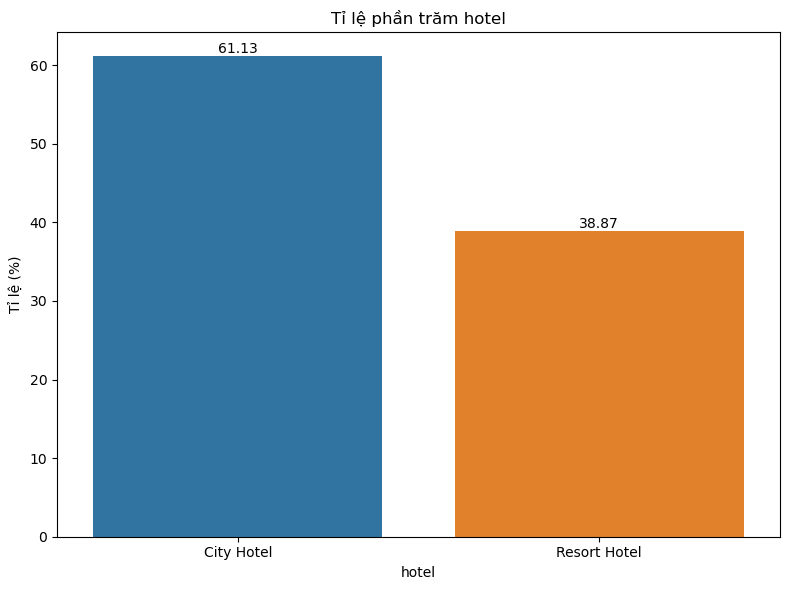

In [90]:
plt.figure(figsize=(8, 6))
sns.barplot(x=hotel_ratios.index, y=hotel_ratios.values)

plt.title('Tỉ lệ phần trăm hotel')
plt.xlabel('hotel')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(hotel_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Nhận xét:**
- City Hotel chiếm tỷ lệ lớn hơn khá nhiều so với Resort Hotel trong bộ dữ liệu. Điều này có thể phản ánh sự phổ biến của City Hotel hơn so với Resort Hotel trong thị trường hoặc trong bộ dữ liệu này.
- City Hotel có tỷ lệ cao hơn có thể do nó thường được đặt ở các khu vực đô thị, nơi có sự tiện lợi trong việc truy cập các điểm du lịch, kinh doanh và mua sắm. Trong khi đó Resort Hotel thường được đặt ở những khu vực biển hoặc nghỉ dưỡng, hướng tới những khách hàng muốn có 1 kỳ nghỉ thư giãn và tiện nghi tại các khu nghỉ dưỡng. Điều này cho thấy về nhu cầu du lịch cũng ảnh hưởng trong việc chọn khách sạn.

##### Đối với thuộc tính `arrival_date_month`

In [24]:
arrival_date_month_ratios = cat_col_df['arrival_date_month'].value_counts(normalize=True) * 100
arrival_date_month_ratios = arrival_date_month_ratios.round(2) 
arrival_date_month_ratios.reset_index()

,arrival_date_month,proportion
0,August,12.88
1,July,11.51
2,May,9.56
3,April,9.05
4,June,8.88
5,March,8.60
6,October,7.93
7,September,7.65
8,February,6.98
9,December,5.87


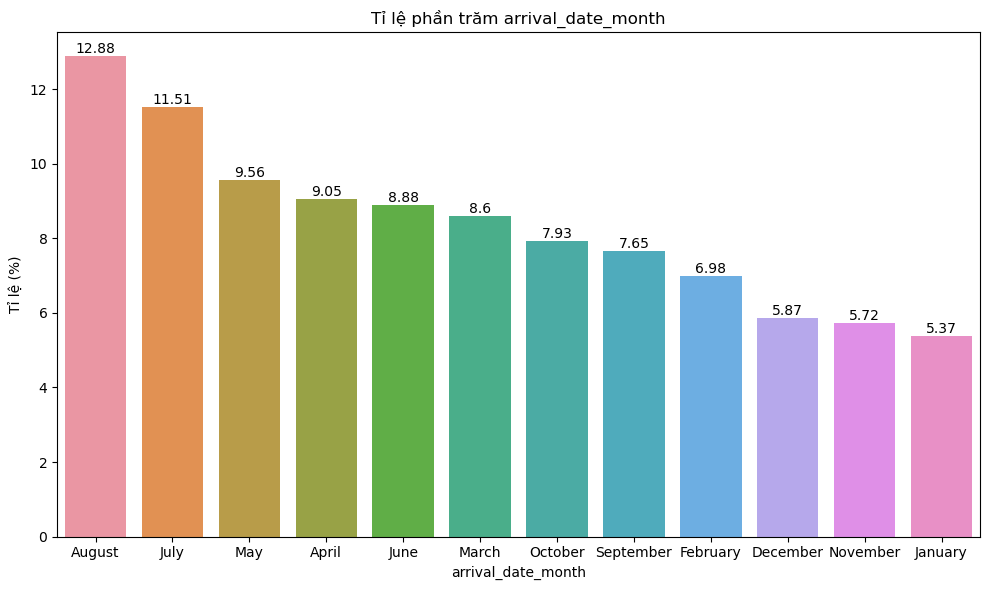

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x=arrival_date_month_ratios.index, y=arrival_date_month_ratios.values)

plt.title('Tỉ lệ phần trăm arrival_date_month')
plt.xlabel('arrival_date_month')
plt.ylabel('Tỉ lệ (%)')

for i, value in enumerate(arrival_date_month_ratios.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Nhận xét:**
- Có sự phân bố không đồng đều về tỷ lệ phần trăm của các tháng. August (tháng 8) là tháng có tỷ lệ phần trăm cao nhất với 12.88%, tiếp theo là July (tháng 7) với 11.51%, và May (tháng 5) với 9.56%.
- Có nhiều yếu tố ảnh hưởng đến phân bố của các tháng như mùa du lịch, thời tiết, kỳ nghỉ học..., nhu cầu đặt khách sạn khi ấy sẽ nhiều. Tháng 8 và 7 thường là thời gian cao điểm du lịch trong mùa hè, khi mà nhiều người nghỉ hè hoặc có kỳ nghỉ lễ dài. Tháng 5 cũng thường là thời điểm du lịch bận rộn do thời tiết ấm áp và đẹp đẽ ở nhiều địa điểm. Trong khi đó, tháng 1 và 11 thường là thời gian ít du khách du lịch hơn do thời tiết lạnh hơn, bắt đầu vào năm học mới, ...
- Nhìn chung thì các tháng vào mùa hè (tháng 6 đến tháng 8) sẽ có lượng khách đến khách sạn nhiều hơn và sẽ ít hơn ở các tháng vào mùa đông (tháng 11 đến tháng 1). Điều này đã phản ánh xu hướng tổng quát về nhu cầu du lịch theo mùa trong năm.


#### Phân tích phân phối đối với biến Num

##### Đối với thuộc tính `lead_time`

In [44]:
data['lead_time'].describe().reset_index()

,index,lead_time
0,count,87396.000000
1,mean,79.891368
2,std,86.052325
3,min,0.000000
4,25%,11.000000
5,50%,49.000000
6,75%,125.000000
7,max,737.000000


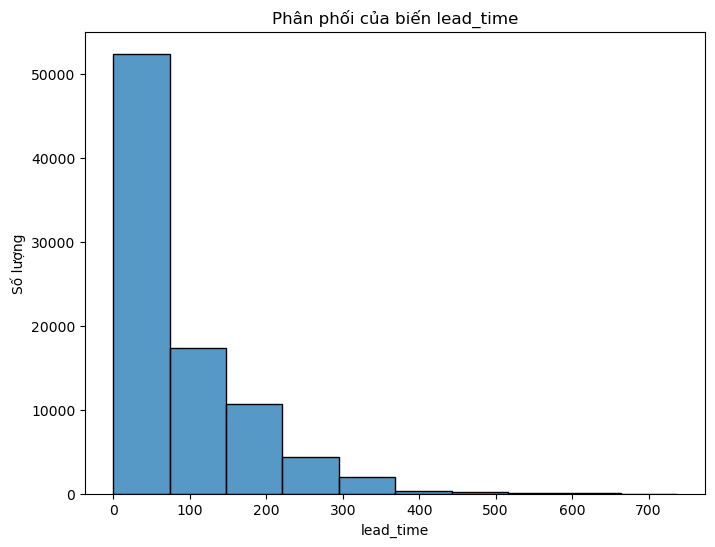

In [93]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data['lead_time'], bins=10, edgecolor='black')

plt.title('Phân phối của biến lead_time')
plt.xlabel('lead_time')
plt.ylabel('Số lượng')
plt.show()

**Nhận xét:**
- Đồ thị có một phân phối không đối xứng, với đỉnh của phân phối lệch về phía bên phải. Có thể thấy, khoảng thời gian đặt phòng và ngày đến của khách hàng thường không quá lớn. Điều này phản ánh rằng trong phần lớn các trường hợp, khách hàng thường đặt phòng trong khoảng thời gian ngắn trước khi đến ngày nhận phòng, có thể là do họ thích lên kế hoạch gần với thời điểm thực hiện chuyến đi hoặc có sự linh hoạt trong việc thay đổi kế hoạch.
  

##### Đối với thuộc tính `arrival_date_week_number`

In [48]:
data['arrival_date_week_number'].describe().reset_index()

,index,arrival_date_week_number
0,count,87396.000000
1,mean,26.838334
2,std,13.674572
3,min,1.000000
4,25%,16.000000
5,50%,27.000000
6,75%,37.000000
7,max,53.000000


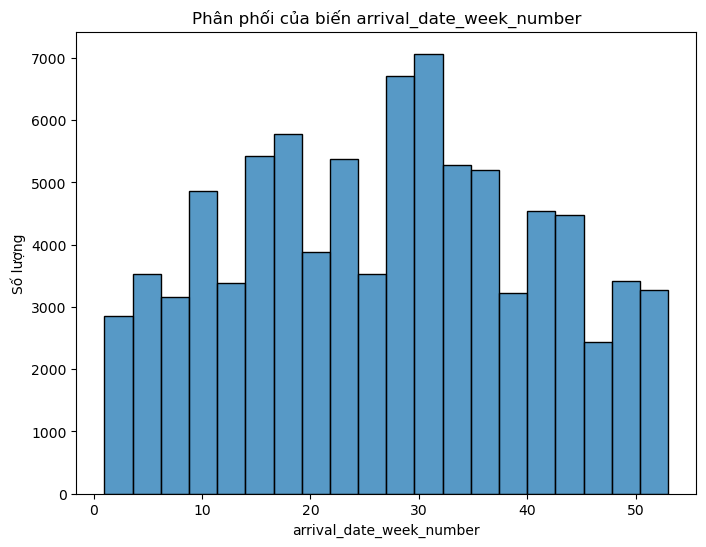

In [91]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data['arrival_date_week_number'], bins=20, edgecolor='black')

plt.title('Phân phối của biến arrival_date_week_number')
plt.xlabel('arrival_date_week_number')
plt.ylabel('Số lượng')
plt.show()

**Nhận xét:**
- Nhìn chung, sự phân phối của biến `arrival_date_week_number` khá đối xứng xung quanh giá trị trung bình.
- Dựa vào biểu đồ ta có thể thấy, số lượng đặt khách sạn tập trung nhiều vào các tuần giữa năm. Đây là thời điểm hè và lượng đặt khách sạn cho du lịch, nghỉ dưỡng sẽ là rất nhiều. Có sự giảm dần khi càng về 2 biên của đồ thị. Đây là các thời điểm đầu năm và cuối năm, do đó thường sẽ ít số lượng đặt khách sạn do thời điểm này thường là thường điểm mà học tập, công việc nhiều, cùng với đó là thời tiết cũng không phù hợp cho việc nghỉ dưỡng, du lịch,...

### **4. EDA 2D**

#### Phân tích hệ số tương quan của các biến Numerical

##### Bước 1: Tính ma trận hệ số tương quan

In [80]:
corr_matrix = num_col_df.corr()

In [81]:
corr_matrix

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
lead_time,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,0.028650,-0.003614,0.005375,-0.078931,0.077028,0.072486,0.132152,0.023564,-0.086541,0.034240,0.114202
arrival_date_year,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041158,-0.023334,-0.054212,0.027256,0.008604,-0.004299,-0.027939,0.176088,-0.039807,0.064268,0.909016
arrival_date_week_number,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.013450,0.014260,0.007199,-0.020819,0.011902,0.019192,0.013843,0.098279,0.008946,0.046599,-0.163390
arrival_date_day_of_month,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015821,-0.000393,-0.008538,0.000152,0.006307,0.006438,0.006588,0.022591,0.009167,-0.001651,0.028672
stays_in_weekend_nights,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028561,0.013668,-0.020636,-0.056653,0.050316,0.153424,-0.031680,0.038972,-0.042920,0.032396,0.004246
stays_in_week_nights,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030479,0.016009,-0.018781,-0.058503,0.085044,0.185665,0.001905,0.053298,-0.044303,0.037823,-0.002843
adults,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023712,0.016640,-0.042097,-0.120914,-0.048061,0.021480,-0.015740,0.248999,0.007802,0.112772,0.034441
children,0.028650,0.041158,0.013450,0.015821,0.028561,0.030479,0.023712,1.000000,0.017423,-0.019208,-0.029423,0.031313,0.040092,-0.020419,0.326293,0.036332,0.044596,0.041110
babies,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,0.017423,1.000000,-0.005395,-0.009193,0.081035,0.029631,-0.006840,0.023446,0.030885,0.094820,-0.017382
previous_cancellations,0.005375,-0.054212,0.007199,-0.008538,-0.020636,-0.018781,-0.042097,-0.019208,-0.005395,1.000000,0.392064,-0.010269,-0.030087,0.003682,-0.050267,-0.003399,0.001871,-0.070222


Bước 2: Trực quan bằng biểu đồ Heatmap

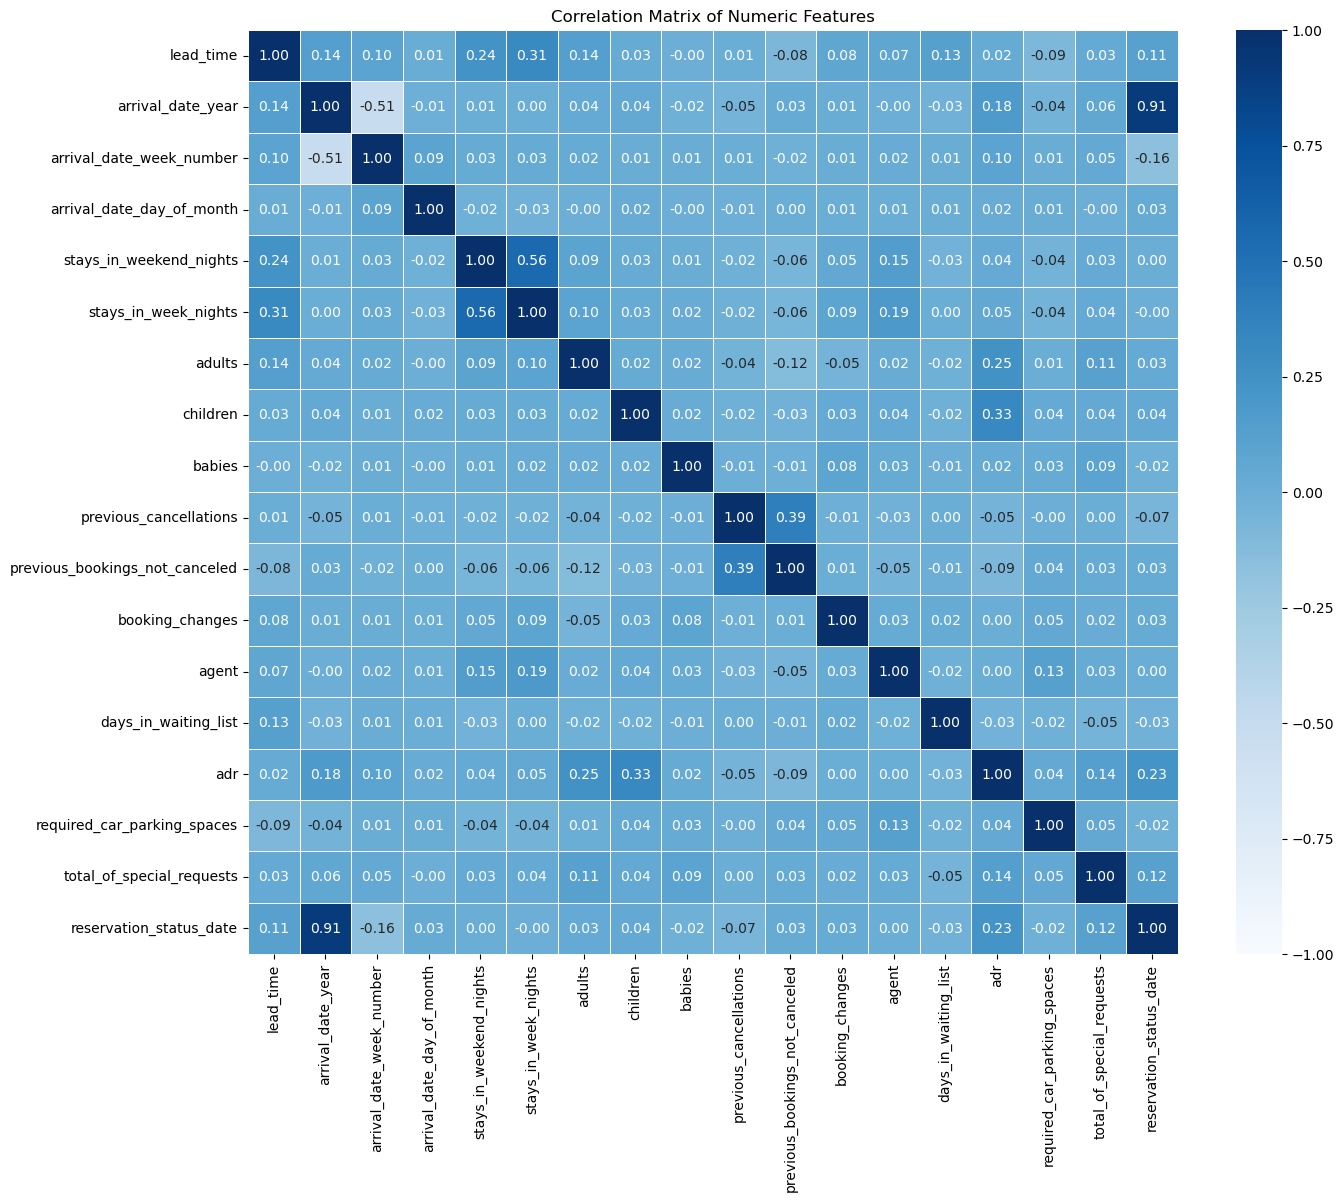

In [82]:
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5,cmap="Blues", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

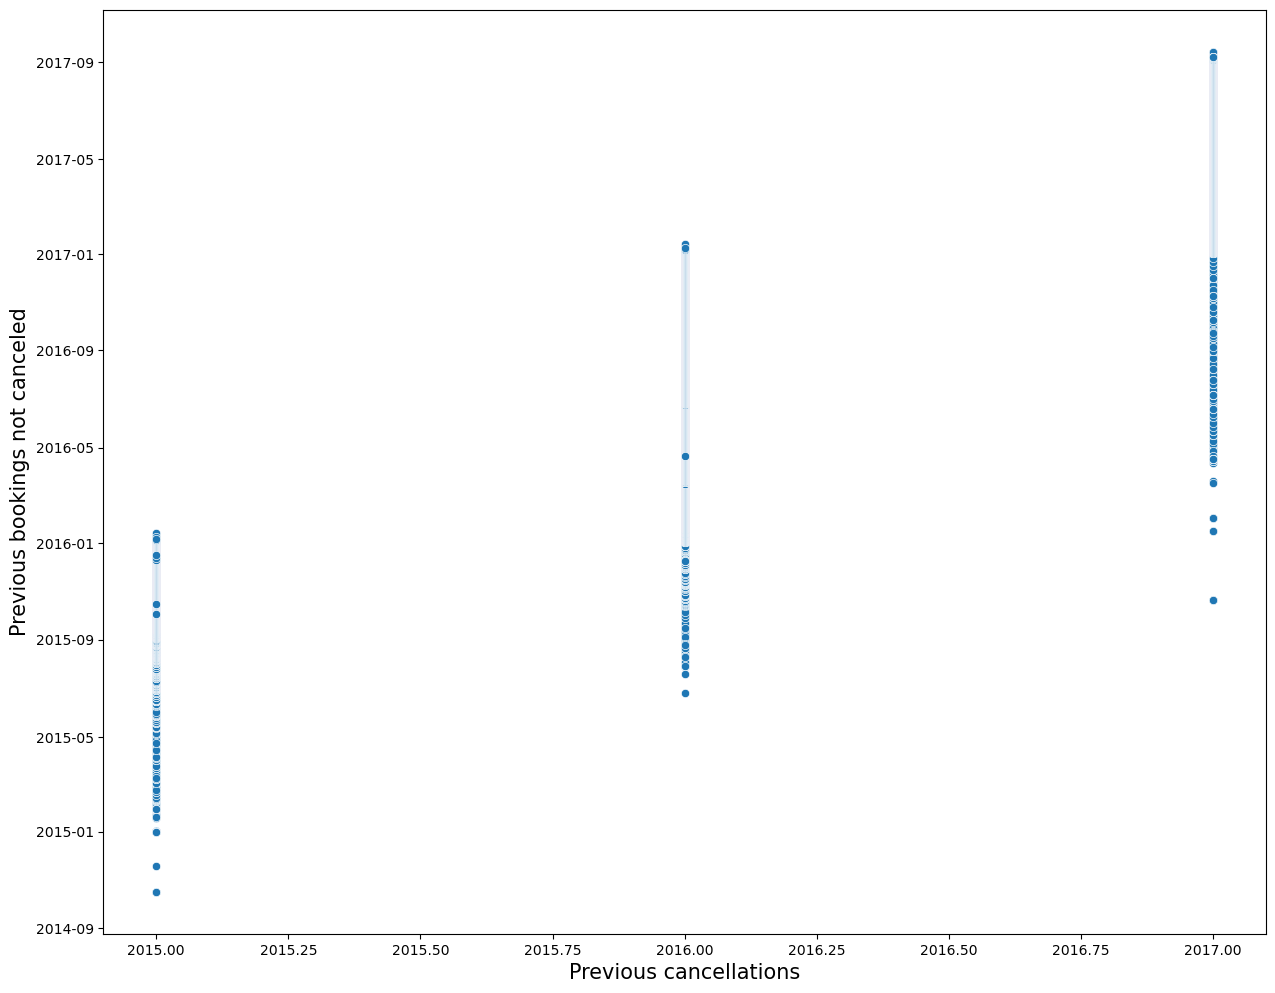

In [83]:
plt.figure(figsize=(15, 12))
sns.scatterplot(data=num_col_df, x="arrival_date_year", y="reservation_status_date")
plt.xlabel('Previous cancellations', size = 15)
plt.ylabel('Previous bookings not canceled', size = 15)
plt.show()

### **5. EDA 3D**

### **6. Insight**

#### **I.Data Understanding**
##### - Dữ liệu có 119390 hàng và 32 cột.
##### - Nhóm sẽ thực hiện việc khám phá dữ liệu thông qua việc chia theo các biến dạng Num và Cate để khám phá. Đối với các biến dạng Num, cột `company` có tỉ lệ thiếu rất cao, lên đến hơn 90% nên nhóm sẽ loại bỏ cột này. Cột `children` và `agent` cũng có tỷ lệ thiêú nhưng không đáng kể, do đó sẽ được điền bằng giá trị mode và median. Đối với các biến dáng Cat, chỉ có cột `country` là có tỉ lệ thiếu nhưng cũng khá nhỏ và sẽ được điền bằng giá trị mode của cột.
##### - Tỷ lệ trùng lặp của dữ liệu là: 26.80%, bao gồm 31994 dòng bị trùng lặp. Sau khi xử lý để loại bỏ các dòng trùng lặp, dữ liệu còn 87396 dòng và 32 cột.

#### **II. EDA 1D**
##### - Thông qua việc tính toán tỉ lệ với các biến Cate, có thể thấy rằng:
##### * City Hotel có độ phổ biến hơn Resort Hotel, điều này cho thấy xu hướng và sự ưu tiên của khách hàng trong đặt khách sạn. Có thể do nhiều yếu tố ảnh hưởng chẳng hạn như về vị trí và nhu cầu du lịch.
##### * Các tháng trong hè (tháng 6 đến tháng 8) thường có tỷ lệ đặt phòng cao hơn, điều này đã phần nào cho thấy về nhu cầu du lịch và kỳ nghỉ trong thời gian này. Trong khi đó các tháng cuối năm và đầu năm thường có tỷ lệ đặt phòng thấp, có thể các yếu tố như thời tiết, và những tháng này thường ít kỳ nghỉ nên đã phần nào có tỷ lệ đặt phòng ít. Có thể thấy, yếu tố về mùa và các tháng trong năm cũng phần nào ảnh hưởng đến việc đặt phòng khách sạn
##### - Thông qua việc phân tích phân phối của các biến Num, có thể thấy rằng:
##### * Đa phần khách hàng đều đặt phòng trong thời gian gần trước khi đến ngày nhận phòng. Điều này có thể là do họ thích lên kế hoạch gần với thời điểm thực hiện chuyến đi hoặc có sự linh hoạt trong việc thay đổi kế hoạch.
##### * Có một sự tập trung đáng kể của lượng đặt phòng khách sạn vào các tuần giữa năm, đặc biệt là trong mùa hè. Điều này có thể phản ánh mùa du lịch và kỳ nghỉ hè, khi người ta thường muốn tận hưởng thời gian nghỉ của họ trong khoảng thời gian này. Số lượng đặt phòng giảm dần khi di chuyển về 2 biên của biểu đồ, đặc biệt là ở đầu năm và cuối năm. Có thể do yếu tố thời tiết không thuận lợi cho việc du lịch hoặc đây là thời điểm việc học và việc làm có lượng công việc và bài học lớn.